# 1-Importing  libraries

In [33]:
#importing  libraries

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import re
%matplotlib inline
import os
import seaborn as sns; sns.set()

# 2-Gathering

In [34]:
#load twitter archive file into pandas df.

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [35]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
with open(file_name, 'wb') as f:
    f.write(response.content)
# load image predictions file into pandas df.    
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [37]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
df_api = pd.DataFrame(df_list)
df_api.head()


,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# 3-Assessing

## i)Archive

In [38]:
df_archive.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None
1155,724983749226668032,NaN,NaN,2016-04-26 15:29:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fred-Rick. He dabbles in parkour. The ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724983749...,12,10,Fred,None,None,None,None
2151,669682095984410625,NaN,NaN,2015-11-26 01:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Louie. He just pounded that bottle of win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669682095...,9,10,Louie,None,None,None,None
1636,684200372118904832,NaN,NaN,2016-01-05 02:30:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Gang of fearless hoofed puppers here. Straight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684200372...,6,10,None,None,None,None,None
1457,695095422348574720,NaN,NaN,2016-02-04 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695095422...,12,10,just,None,None,pupper,None
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None


In [39]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [40]:

df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [41]:
df_archive.isnull().sum().sum()


11140

In [42]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [43]:
df_archive[df_archive.rating_numerator < 10].count()[0]

440

In [44]:
df_archive[df_archive.rating_denominator< 10].count()[0]

3

In [45]:
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Bailey         7
Buddy          7
Toby           7
Daisy          7
Jack           6
Rusty          6
Bella          6
Jax            6
Leo            6
Dave           6
Milo           6
Oscar          6
Stanley        6
Scout          6
Koda           6
Phil           5
            ... 
Venti          1
Jareld         1
Dallas         1
Jersey         1
Ralphy         1
Oreo           1
Finnegus       1
Brat           1
Berkeley       1
Crumpet        1
Timber         1
Jaycob         1
Fido           1
Dex            1
Schnitzel      1
Schnozz        1
Steve          1
Stewie         1
Sweet          1
by             1
Charleson      1
Ben            1
Tilly          1
Willy          1
Jeb            1
Tove           1
Miley          1
Leonidas      

## ii)Image_predictions

In [46]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [49]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## iii)Api

In [50]:
df_api.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [51]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [52]:
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


### Quality issues 

    1-There is missing phhotos as the image_predictions_df=2075  but df_archive =2356 .
    2- extract the source of the tweet and covert it to categorical.
    3-df_archive contains 181 retweets and 78 replies which not needed.
    4-The (doggo, floofer, pupper, puppo ,name) columns has None for missing values.
    5-timestamp column should be datetime instead of str.
    6-rating_numerator column has values less than 10 .
    7-rating_denominator column has values less than 10 .
    8-name column have some unvalid values like (a , an , the , all ).
    9-Rename p1, p2, p2 with more obvious names (prediction_x) and drop unsuable columns from image_predictions.

    
  
    
    

### Tidiness issues

    1-there are 3 dataframes, only 1 dataframe should suffice to incorporate the data we need.
    2-doggo, floofer, pupper, puppo columns should be at one column.
    3-the columns (p1, p1_dog, p1_conf, ...etc) should be just breed and confidence.
    



# 3-Cleaning

In [53]:
# copy of our data frames 
archive_clean = df_archive.copy()
image_predictions_clean = image_predictions_df.copy()
api_clean = df_api.copy()

# (T_1) Define
 Merge the 3 dataframes into 1 master dataframe

# Code

In [54]:
master_df = pd.merge(archive_clean, api_clean, on=['tweet_id','tweet_id'],how='left')

# Then merge them with Image_predictions 
master_df = pd.merge(master_df, image_predictions_clean, on='tweet_id',how='left')

# Test

In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

# (Q_1) Define
Remove tweets that don't have an image

# Code

In [56]:
#delete the tweets without an image
master_df = master_df[master_df.jpg_url.notnull()]

# Test

In [57]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
favorite_count                2073 

# (Q_2)Define
Extract tweet source from source column.

# Code

In [58]:
master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2034
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [59]:
# Use re library with findall function and extract real source from tags > ...... <
master_df['source'] = master_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

# Test

In [60]:
# Check extracted correct information
master_df['source'].value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

# (Q_3) Define
 Remove retweets and replies

# Code

In [61]:
# remove retweets
master_df = master_df[master_df.retweeted_status_id.isnull()]

# drop the 3 columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp".
master_df = master_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

# remove replies
master_df = master_df[master_df.in_reply_to_status_id.isnull()]
#drop the 2 columns "in_reply_to_status_id" and "in_reply_to_user_id". 
master_df = master_df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

# Test

In [62]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

# (Q_4)Define
Replace 'None' with nan for Columns (doggo, floofer, pupper, puppo).

# Code

In [63]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col in col_list:
    master_df[col] = master_df[col].replace('None', np.nan)


# Test

In [64]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null floa

# (T_2)Define


# Code
Merge (doggo, floofer, pupper, puppo) columns in dog_stage column .

In [65]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
master_df['dog_stage'] = master_df[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
master_df.dog_stage = master_df.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
master_df = master_df.drop(columns = cols, axis =1)

# Test

In [66]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non

# (Q_5)Define 
Converte timestamp column to datetime.

# Code

In [67]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)

# Test


In [68]:
master_df['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
31     2017-07-15 16:17:19
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

# (Q_6)Define
Extract rating scores correctly from tweet text using RegEx and convert it to float

# Code

In [69]:
master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [70]:
new_ratings = master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_ratings

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,0
45,13.5
695,9.75
763,11.27
1712,11.26


In [71]:
master_df.loc[new_ratings.index, 'rating_numerator'] = new_ratings.values

In [72]:
master_df.rating_numerator = master_df.rating_numerator.astype('float')

# Test

In [73]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.360418e+17,12.178985,10.477423,8949.106545,2784.449518,1.201928,0.594558,1.345850e-01,6.016556e-02
std,6.752810e+16,41.607230,6.853275,12267.799790,4697.662893,0.559020,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758656e+17,10.000000,10.000000,1997.000000,628.500000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.088343e+17,11.000000,10.000000,4147.000000,1367.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.880951e+17,12.000000,10.000000,11402.500000,3239.000000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


# (Q_7)Define
Remove values other than 10 for rating_denominator

# Code

In [74]:
master_df = master_df[master_df['rating_denominator'] == 10]

# Test

In [75]:
master_df.rating_denominator.value_counts()

10    1954
Name: rating_denominator, dtype: int64

# (Q_8)Define
Replace 'None' with np.name in master_df name column & remove any rows with invalid names which starts with lower laters.

# Code

In [76]:
master_df[~master_df.name.str.istitle()].name.unique()


array(['such', 'a', 'quite', 'one', 'incredibly', 'BeBe', 'very', 'DonDon',
       'my', 'not', 'his', 'an', 'just', 'getting', 'unacceptable', 'all',
       'infuriating', 'CeCe', 'the', 'actually', 'by', 'officially',
       'light', 'space', 'JD', 'DayZ'], dtype=object)

In [77]:
master_df.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

# Test

In [78]:
master_df.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
Jax           6
Koda          6
Bo            6
Stanley       6
Bella         6
Leo           5
Scout         5
Louis         5
Rusty         5
Dave          5
Chester       5
Milo          5
Buddy         5
Bailey        5
Oscar         5
Duke          4
Larry         4
Clark         4
Finn          4
             ..
Maude         1
Tyrone        1
Sweet         1
Keurig        1
Adele         1
Ben           1
Gustav        1
Tilly         1
Daniel        1
Clarq         1
Stuart        1
Chaz          1
Edgar         1
Jett          1
Brandy        1
Banjo         1
Augie         1
Chuq          1
Odin          1
Mairi         1
Jamesy        1
Torque        1
Sundance      1
Pubert        1
Kathmandu     1
Emmie         1
Grizzie       1
Gidget        1
Aiden         1
Cuddles       1
Name: name, Length: 910,

# (T_3)Define
Create breed and confidence columns with highest confidence predictions and drop other columns

# Code

In [79]:

breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in master_df.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
master_df['breed'] = breed
master_df['confidence'] = confidence

# Test

In [80]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              1954 non-null int64
timestamp             1954 non-null datetime64[ns]
source                1954 non-null object
text                  1954 non-null object
expanded_urls         1954 non-null object
rating_numerator      1954 non-null float64
rating_denominator    1954 non-null int64
name                  1346 non-null object
favorite_count        1954 non-null float64
retweet_count         1954 non-null float64
jpg_url               1954 non-null object
img_num               1954 non-null float64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null object
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null object
p3                    1954 non-null object
p3_conf               1954 non-null float64
p3_dog              

# (9)Define
Rename p1, p2, p2 with more obvious names (prediction_x) and drop unsuable columns from image_predictions.



# Code

In [81]:
master_df.rename(columns={'p1': 'prediction_1',
 'p2': 'prediction_2',
 'p3': 'prediction_3'}, inplace=True)


In [82]:
# Drop predictions and prediction probability columns
master_df = master_df.drop(['img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],axis=1)

# Test 

In [83]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1954 non-null int64
timestamp             1954 non-null datetime64[ns]
source                1954 non-null object
text                  1954 non-null object
expanded_urls         1954 non-null object
rating_numerator      1954 non-null float64
rating_denominator    1954 non-null int64
name                  1346 non-null object
favorite_count        1954 non-null float64
retweet_count         1954 non-null float64
jpg_url               1954 non-null object
prediction_1          1954 non-null object
prediction_2          1954 non-null object
prediction_3          1954 non-null object
dog_stage             303 non-null category
breed                 1449 non-null object
confidence            1449 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 261.8+ KB


# Storing

In [84]:
master_df.to_csv('twitter_archive_master.csv', index=False)

In [85]:
df = pd.read_csv('twitter_archive_master.csv')

# Analysis & Visualizations

In [86]:
# Quick analysis of some of the numbers 
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence
count,1.954000e+03,1954.000000,1954.0,1954.000000,1954.000000,1449.000000
mean,7.361899e+17,11.655977,10.0,8971.329069,2785.858751,0.614341
std,6.768652e+16,41.051621,0.0,12302.225779,4705.353047,0.260345
min,6.660209e+17,0.000000,10.0,81.000000,16.000000,0.044333
25%,6.758214e+17,10.000000,10.0,1960.500000,624.750000,0.392108
50%,7.087745e+17,11.000000,10.0,4148.000000,1366.500000,0.615163
75%,7.883537e+17,12.000000,10.0,11414.750000,3243.000000,0.852088
max,8.924206e+17,1776.000000,10.0,132810.000000,79515.000000,0.999956


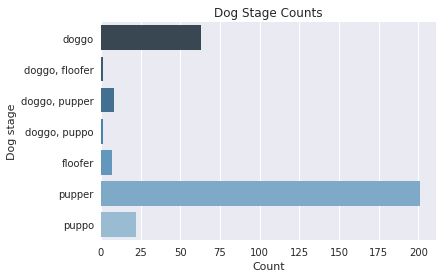

In [87]:
data = df.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()

In [88]:
df['dog_stage'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

Most dogs are classified into the "Pupper" stage: "A dog is a small dog, and it is usually younger. It can be equal, if
Not more mature than most dogs. A dog who is inexperienced, unfamiliar, or in any way unprepared for
Responsibilities associated with being a dog. 

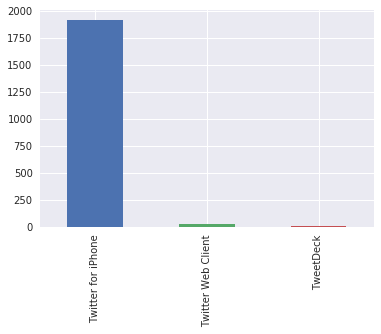

In [89]:
df['source'].value_counts().plot.bar();

In [90]:
df['source'].value_counts()

Twitter for iPhone    1915
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

The Twitter app is the most widely used platform of twitter users use the mobile iPhone app to originate
tweets. The other  use the Twitter web client (mobile and desktop) and TweetDeck.

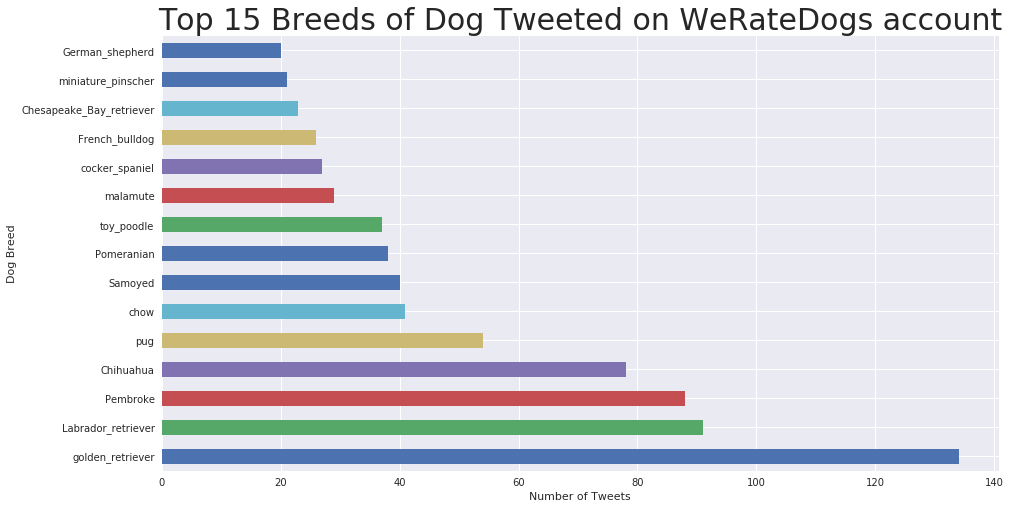

In [91]:
# Plot a horizontal bar chart to show top 15 breeds
fig = plt.figure(figsize=(15,8))
df.groupby('breed').count()['confidence'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 15 Breeds of Dog Tweeted on WeRateDogs account",fontsize=30)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets");

In [92]:
df['breed'].value_counts()

golden_retriever                  134
Labrador_retriever                 91
Pembroke                           88
Chihuahua                          78
pug                                54
chow                               41
Samoyed                            40
Pomeranian                         38
toy_poodle                         37
malamute                           29
cocker_spaniel                     27
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 21
German_shepherd                    20
Staffordshire_bullterrier          19
Siberian_husky                     19
Shetland_sheepdog                  18
Eskimo_dog                         18
Maltese_dog                        17
Cardigan                           17
Shih-Tzu                           17
beagle                             17
Rottweiler                         16
Italian_greyhound                  16
kuvasz                             15
Lakeland_ter

There are more golden Retrievers than any other dog in the dataset. Labrador Retrievers are the second most
common.


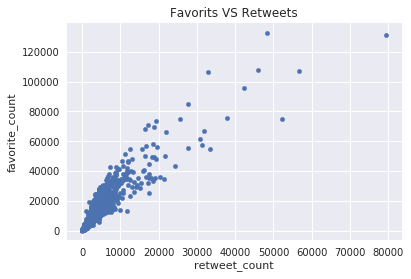

In [93]:
df.plot(x = 'retweet_count' , y = 'favorite_count' ,kind = 'scatter',title='Favorits VS Retweets' ,fontsize=10)



There is a strong positive correlation between number of retweets and favorite count. It does seem reasonable
that the more a post is retweeted, the more eyes view the post, the more favorites the post receives.

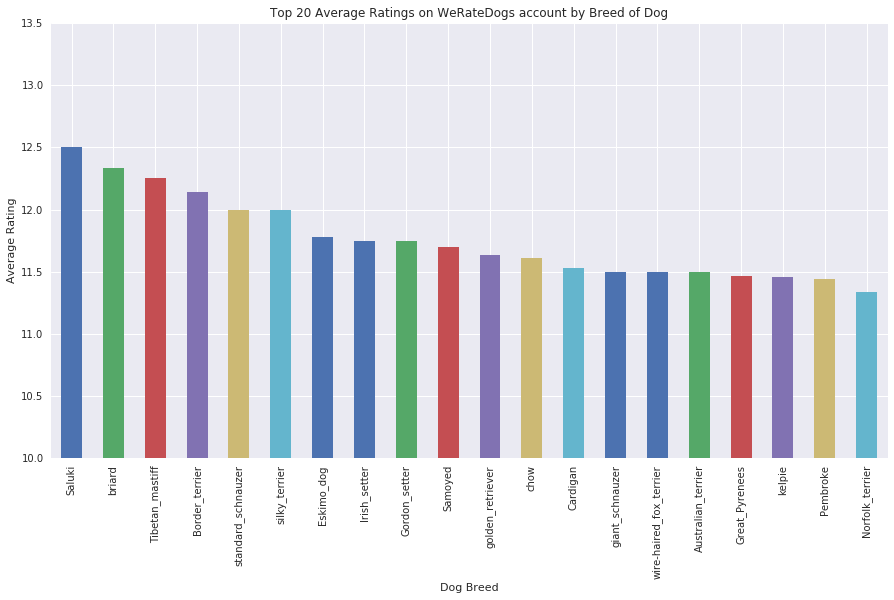

In [94]:
# Let's plot the top scores for the top 0 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).nlargest(20).plot(kind='bar')
plt.title("Top 20 Average Ratings on WeRateDogs account by Breed of Dog")
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,13.5);

So the top breeds by rating are Bouvier des Flandres, Saluki, Briard, Tibetan Mastiff and Border Terrier. These breeds are not as well-known as the breeds in our top tweeted dogs. Quickly checking I see that there is only one rating for Bouvier des Flandres. So this plot might be misleading. Let's redo the chart but include only breeds with at least 10 ratings.

In [ ]:
!jt -r